In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Data Extraction

In [2]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [3]:
#check the shape of dataset
df.shape

(768, 9)

In [4]:
#check all columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#check type of dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
#check missing value of dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#describe all columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Figure size 720x576 with 0 Axes>

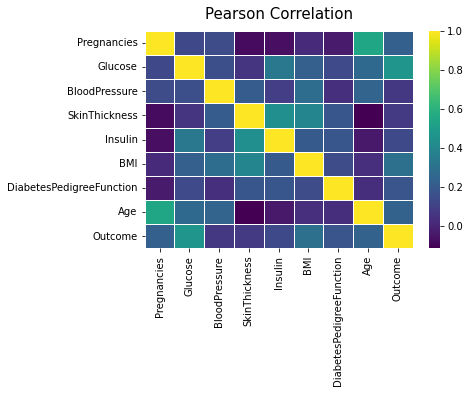

<Figure size 720x576 with 0 Axes>

In [10]:
#visualize correlation of each variable using pearson correlation
sns.heatmap(df.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.figure(figsize = (10,8))

# Linear Regression - Predizer a quantidade de gravidez baseado na idade

In [11]:
# Vamos usar aproximidamente 30% dos dados como dados de teste
number = int(df.shape[0]*0.3) 

In [12]:
# Separando o que é dados que serão inputados na nossa
# regressão e o que será usado para testa-ela
# lembrando, x equivale aos dados que usamos
# para prever y
X_train = df['Glucose'][0:number].values.reshape((df['Glucose'][0:number].shape[0],1))
X_test = df['Glucose'][number::].values.reshape((df['Glucose'][number::].shape[0],1))

In [13]:
# Separando o que é dados que serão inputados na nossa
# regressão e o que será usado para testa-ela
# lembrando, y equivale aos dados que queremos prever
y_train = df.Age[0:number].values.reshape((df['Glucose'][0:number].shape[0],1))
y_test = df.Age[number::].values.reshape((df['Glucose'][number::].shape[0],1))

In [14]:
# montando nosso modelo de regressão linear
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [15]:
# prevendo o dados de teste
y_pred = regr.predict(X_test)
print('Maior Diferença entre o Valor Previsto e o Valor Real:\n',max(y_pred-y_test))

Maior Diferença entre o Valor Previsto e o Valor Real:
 [21.87369958]


In [16]:
# Verificando o quão relacionados estão X e Y
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.13338942]]


In [17]:
# verificando o erro médio
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

Mean squared error: 138.93


In [18]:
# r2_score
'''O coeficiente de determinação, também chamado de R², é uma medida de ajuste de um modelo estatístico
linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável 
aleatória. O R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa
a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais 
explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 
significa que o modelo linear explica 82,34% da variância da variável dependente a partir do 
regressores (variáveis independentes) incluídas naquele modelo linear.'''

# se der 1, nosso modelo está maravilhosamente bom
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.02


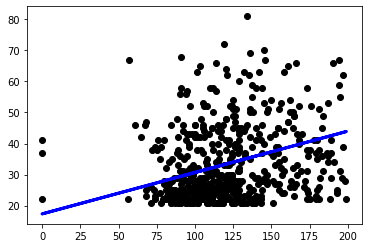

In [19]:
# plotando um gráfico
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Machine Learning - Predizer a ocorrência de diabetes 

In [20]:
preditora = df.drop('Outcome',axis=1)
alvo      = df['Outcome']

In [21]:
x_treino,x_test,y_treino,y_test = train_test_split(preditora, alvo, test_size = 0.3)

In [22]:
# ExtraTreesClassifier
'''An extra-trees classifier.

This class implements a meta estimator that fits a number of randomized decision trees 
(a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the 
predictive accuracy and control over-fitting.
'''

modelo = ExtraTreesClassifier()
modelo.fit(x_treino,y_treino)

resultado = modelo.score(x_test,y_test)
print('Acurácia: ',resultado)

Acurácia:  0.7835497835497836


# Conclusions

* A acurácia utilizando o extra-trees classifier é 0.7575757575757576
* A relação entre gravidez e idade não obedece uma relação linear de acordo com a análise de regressão linear feita, dessa forma, já era de se esperar que o coeficiente de determinação (r2_score) fosse próximo a zero.